In [32]:
from random import sample

In [18]:
f = !ls captures
len(f) / 2

539.0

In [23]:
classFiles.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [25]:
classFiles = {str(i): [] for i in range(1, 7)}
for i in f:
    if ".txt" not in i:
        continue
    with open(f"captures/{i}", "r") as fh:
        ant = fh.read()
    classes = [ln.split(" ")[0] for ln in ant.split("\n") if ln != '']
    for c in set(classes):
        if c == '':
            continue
        classFiles[c].append(i)

In [37]:
setSize = 40
for i in range(1, 7):
    fileList = classFiles[str(i)]
    selectedFiles = sample(fileList, setSize * 3)
    trainFiles = sample(selectedFiles, setSize)
    valFiles = sample([f for f in selectedFiles if f not in trainFiles], setSize)
    testFiles = [f for f in selectedFiles if f not in trainFiles + valFiles]

    for f in trainFiles:
        imgFile = f[:-3] + "jpg"
        !cp captures/$f images/train/
        !cp captures/$imgFile images/train/

    for f in valFiles:
        imgFile = f[:-3] + "jpg"
        !cp captures/$f images/val/
        !cp captures/$imgFile images/val/

    for f in testFiles:
        imgFile = f[:-3] + "jpg"
        !cp captures/$f images/test/
        !cp captures/$imgFile images/val/

<Axes: >

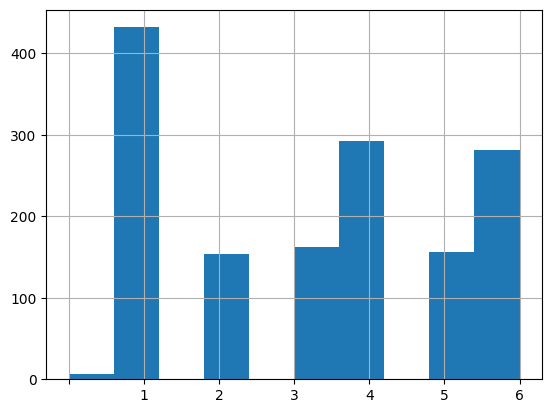

In [20]:
import pandas as pd
d = pd.Series(classes).sort_values()
d.hist()

In [21]:
d.value_counts()

1    432
4    292
6    282
3    162
5    156
2    154
       6
Name: count, dtype: int64